In [1]:
from matplotlib import pyplot as plt
from matplotlib.image import imread
from numpy.linalg import inv
import numpy as np
import os

In [2]:
dataset_path='DATA/'
dataset_dir=os.listdir(dataset_path)

In [3]:
training_data1=[]
testing_data1=[]
for i in range(1,41):
    j=1
    image=os.listdir('DATA/'+'s'+str(i)+'/')
    for k in image:
        if(j<=6):
            img=imread('DATA/'+'s'+str(i)+'/'+k)
            l=np.asarray(img)
            training_data1.append(l.flatten())
            
        else:
            img=imread('DATA/'+'s'+str(i)+'/'+k)
            l=np.asarray(img)
            testing_data1.append(l.flatten())
        j=j+1
print(len(training_data1))
print(len(testing_data1))

240
160


In [4]:
training_data=np.array(training_data1)
print(training_data.shape)
testing_data=np.array(testing_data1)
print(testing_data.shape)

(240, 10304)
(160, 10304)


In [23]:
def Principal_component(training_data,components):
    mean=np.zeros((1,10304))
    for i in training_data:
        mean=np.add(mean,i)
    mean=np.divide(mean,240.0).flatten()
    norm_training_data=np.ndarray(shape=(training_data.shape))
    for i in range(240):
        norm_training_data[i]=np.subtract(training_data[i],mean)
    cov_mat=np.cov(norm_training_data)
    cov_mat=np.divide(cov_mat,240.0)
    eig_v,eig_vec=np.linalg.eig(cov_mat)
    eig_tuple = [(eig_v[index], eig_vec[:,index]) for index in range(len(eig_v))]
    eig_tuple.sort(reverse=True)
    eig_v_sort  = [eig_tuple[index][0] for index in range(len(eig_v))]
    eig_vec_sort = [eig_tuple[index][1] for index in range(len(eig_v))]
    reduced_data = np.array(eig_vec_sort[:components]).transpose()
    proj_data = np.dot(training_data.transpose(),reduced_data)
    proj_data = proj_data.transpose()
    wx = np.array([np.dot(proj_data,img) for img in norm_training_data])
    return proj_data, wx

In [24]:
components=40
proj_data, proj_sig=Principal_component(training_data,components)
print(proj_sig.shape)
print(proj_data.shape)

(240, 40)
(40, 10304)


In [25]:
mean_each_class=np.zeros((40,40))
mean_global=np.zeros((1,40))
for i in range(40):
    a = proj_sig[6*i:6*i+6]
    for j in a:
        mean_each_class[i,:] = np.add(mean_each_class[i,:],j)
    mean_each_class[i,:] = np.divide(mean_each_class[i,:],float(len(a)))

for i in proj_sig:
    mean_global = np.add(mean_global,i)
mean_global= np.divide(mean_global,float(len(proj_sig)))
print(mean_global.shape)
print(mean_each_class.shape)
print(mean_global)

(1, 40)
(40, 40)
[[ 3.45753506e-09  2.14204192e-09  2.87157794e-09 -1.55996531e-09
  -3.18201880e-09 -1.02445483e-09 -1.97906047e-10 -7.06252952e-10
   1.94025536e-11 -6.20881716e-10 -6.70964558e-10  7.99385210e-10
  -5.87897375e-10 -1.69772344e-11  5.62674055e-10 -4.03573116e-10
  -7.14013974e-10 -5.47152013e-10  6.36403759e-10  2.59994219e-10
  -3.74469285e-10  1.00893279e-09  3.13351241e-10 -1.51339918e-10
  -6.11180440e-11  2.75516262e-10 -4.75362564e-10 -1.55220429e-11
   2.05667069e-10 -7.49423634e-11 -1.00893279e-10  1.19519730e-09
  -6.36403759e-10  1.54977897e-10  1.71130523e-09  2.81337028e-11
   4.22975669e-10  1.35817875e-10 -2.25069622e-10 -6.62112143e-11]]


In [42]:
wc_scatter = np.ndarray(shape=(40*6,40), dtype=np.float64)
for i in range(40):
    for j in range(6):
        wc_scatter[i*6+j,:] = np.subtract(proj_sig[i*6+j,:],mean_each_class[i,:])
sw = np.zeros((40,40))
for i in range(40):
    xa = wc_scatter[6*i:6*i+6,:]
    xa = xa.transpose()
    cov = np.dot(xa,xa.T)
    sw = sw + cov
sw.shape
print(sw)

[[ 3.68437906e+16 -2.22909613e+14 -1.13317787e+15 ... -2.61876646e+14
   6.62493395e+14  4.72436819e+14]
 [-2.22909613e+14  3.01711481e+16 -1.92385146e+15 ... -1.07075109e+15
   1.27879700e+15  1.14458212e+15]
 [-1.13317787e+15 -1.92385146e+15  1.13492168e+16 ...  1.95365742e+14
  -3.84661366e+14 -4.19917880e+14]
 ...
 [-2.61876646e+14 -1.07075109e+15  1.95365742e+14 ...  1.88128446e+14
  -7.48040032e+13 -8.87107924e+13]
 [ 6.62493395e+14  1.27879700e+15 -3.84661366e+14 ... -7.48040032e+13
   2.27341186e+14  7.89793401e+13]
 [ 4.72436819e+14  1.14458212e+15 -4.19917880e+14 ... -8.87107924e+13
   7.89793401e+13  2.08381143e+14]]


In [43]:
normalised_proj_sig = np.ndarray(shape=(40*6,40), dtype=np.float64)
for i in range(40*6):
    normalised_proj_sig[i,:] = np.subtract(proj_sig[i,:],mean_global)
sb = np.dot(normalised_proj_sig.T,normalised_proj_sig)
sb = np.multiply(sb,6.0)
sb.shape

(40, 40)

In [30]:
cost_func = np.dot(inv(sw), sb)
cost_func.shape

(40, 40)

In [31]:
eigenv, eigenvec, = np.linalg.eig(cost_func)

In [32]:
eig_p = [(eigenv[index], eigenvec[:,index]) for index in range(len(eigenv))]
eig_p.sort(reverse=True)
eigv_sort  = [eig_p[index][0] for index in range(len(eigenv))]
eigvec_sort = [eig_p[index][1] for index in range(len(eigenv))]

In [36]:
reduced_data = np.array(eigvec_sort[:20]).transpose()
reduced_data.shape

(40, 20)

In [37]:
proj_sig.shape
FP = np.dot(proj_sig, reduced_data)
FP.shape

(240, 20)

In [38]:
proj_data1 = np.dot(training_data.transpose(),FP)
proj_data1 = proj_data1.transpose()
proj_data1.shape

(20, 10304)

In [39]:
mean_face = np.zeros((1,10304))
for i in training_data:
    mean_face = np.add(mean_face,i)
mean_face = np.divide(mean_face,float(len(training_data))).flatten()

In [40]:
count=0
num_images=0
correct_pred=0
def recogniser(img_number):
    global count,highest_min,num_images,correct_pred
    num_images+= 1
    unknown_face_vector = testing_data[img_number,:]
    normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)
    PEF = np.dot(proj_data,normalised_uface_vector)
    proj_fisher_test_img = np.dot(reduced_data.T,PEF)
    diff  = FP - proj_fisher_test_img
    norms = np.linalg.norm(diff, axis=1)
    index = np.argmin(norms)
    set_number = int(img_number/4)
    t0 = 7000000
    if norms[index] < t0:
        if(index>=(6*set_number) and index<(6*(set_number+1))):
            correct_pred += 1
    else:
        if(img_number>=40):
            correct_pred += 1
for i in range(len(testing_data)):
    recogniser(i)
print('Correct predictions: {}/{} = {}%'.format(correct_pred, num_images, correct_pred/num_images*100.00))

Correct predictions: 153/160 = 95.625%


Text(0.5, 1.0, 'Accuracy vs. k-value')

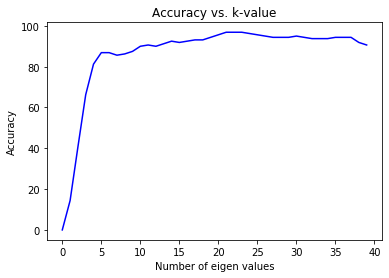

In [41]:
accuracy = np.zeros(len(eigv_sort))
def tester(img_number,reduced_data,FP,num_images,correct_pred):
    num_images+= 1
    unknown_face_vector = testing_data[img_number,:]
    normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)
    PEF = np.dot(proj_data,normalised_uface_vector)
    proj_fisher_test_img = np.dot(reduced_data.T,PEF)
    diff  = FP - proj_fisher_test_img
    norms = np.linalg.norm(diff, axis=1)
    index = np.argmin(norms)
    set_number = int(img_number/4)
    t0 = 7000000
    if norms[index] < t0:
        if(index>=(6*set_number) and index<(6*(set_number+1))):
            correct_pred += 1
    else:
        if(img_number>=40):
            correct_pred += 1
    return num_images,correct_pred

def calculate(k):
    reduced_data = np.array(eigvec_sort[:k]).transpose()
    FP = np.dot(proj_sig, reduced_data)
    num_images=0
    correct_pred=0
    for i in range(len(testing_data)):
        num_images,correct_pred = tester(i,reduced_data,FP,num_images,correct_pred)
    accuracy[k] = correct_pred/num_images*100.00
for i in range(1,len(eigv_sort)):
    calculate(i)
fig, axi = plt.subplots()  
axi.plot(np.arange(len(eigv_sort)), accuracy, 'b')  
axi.set_xlabel('Number of eigen values')  
axi.set_ylabel('Accuracy')  
axi.set_title('Accuracy vs. k-value')